<a href="https://colab.research.google.com/github/joe052/python-alpha/blob/main/joe_karanja_DSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Technical Assessment
Duration: 2 hours


## Setup
You will be working with two datasets representing e-commerce data:
- `customers.csv`: Customer demographic and subscription information
- `transactions.csv`: Historical transaction records


## Part 1: Exploratory Data Analysis (25 minutes)
1. Load and examine both datasets
2. Identify and handle any data quality issues you find
3. Create a summary of key metrics and patterns you discover
4. Document any assumptions or decisions you make during this process


## Part 2: Customer Analysis (35 minutes)
Your goal is to help the business understand its customer base better.


1. Develop a customer segmentation approach using the available data
2. Calculate customer lifetime value (CLV) for each customer
3. Create at least one visualization that reveals meaningful insights about the customer segments
4. Write a brief (2-3 paragraphs) summary of your findings for business stakeholders


## Part 3: Sales Performance Analysis (35 minutes)
The business wants to understand sales patterns and identify opportunities for growth.


1. Analyze sales trends over time, considering factors like:
   - Seasonal patterns
   - Product performance
   - Geographic distribution
2. Identify and investigate any anomalies in the transaction data
3. Create a visualization dashboard (minimum 2 plots) that would be useful for business leaders
4. Propose three actionable recommendations based on your analysis


## Part 4: Open-ended Challenge (25 minutes)
Choose ONE of the following challenges:


A. Predictive Analytics
- Build a simple model to predict customer churn risk
- Explain your feature selection and methodology


B. Product Analysis
- Identify product affinities and purchasing patterns
- Recommend a strategy for product bundling or promotions


C. Customer Engagement Strategy
- Analyze the relationship between subscription types and purchasing behavior
- Propose a data-driven strategy for upgrading customers to premium subscriptions


## Evaluation Criteria
- Code quality and organization
- Problem-solving approach
- Business acumen and insight generation
- Communication of findings
- Creative thinking and initiative
- Technical proficiency


## Submission Guidelines
1. Submit your code as a Jupyter notebook or Python scripts
2. Include comments explaining your thought process
3. Provide a brief README explaining how to run your code
4. Include any assumptions or limitations of your analysis
5. Submit in the following format - firstname_lastname_dss.ipynb
6. Do not code on this file directly - create a new notebook by saving a copy in your drive.


## Notes
- Feel free to use any Python libraries you're comfortable with
- Quality is more important than quantity
- Document any additional data you would request in a real-world scenario

## Data generation

In [ ]:
%%capture

import pandas as pd
import numpy as np
from datetime import datetime, timedelta

def generate_test_data(seed=42):
    """
    Generates a realistic e-commerce dataset with some intentional data quality issues
    that good candidates should identify and handle appropriately.
    """
    np.random.seed(seed)

    # Generate dates
    base = datetime(2023, 1, 1)
    dates = [base + timedelta(days=x) for x in range(365)]

    # Create customer data with various patterns and issues
    n_customers = 1000
    customers = pd.DataFrame({
        'customer_id': range(1, n_customers + 1),
        'signup_date': [base + timedelta(days=np.random.randint(0, 365)) for _ in range(n_customers)],
        'country': np.random.choice(['US', 'UK', 'FR', 'DE', 'ES'], n_customers, p=[0.4, 0.25, 0.15, 0.1, 0.1]),
        'age_group': np.random.choice(['18-25', '26-35', '36-50', '50+', None], n_customers, p=[0.2, 0.35, 0.25, 0.15, 0.05]),
        'subscription_type': np.random.choice(['basic', 'premium', 'enterprise'], n_customers, p=[0.5, 0.3, 0.2])
    })

    # Create transaction data with seasonal patterns and anomalies
    n_transactions = 50000
    transactions = pd.DataFrame({
        'transaction_id': range(1, n_transactions + 1),
        'customer_id': np.random.choice(customers['customer_id'], n_transactions),
        'date': np.random.choice(dates, n_transactions),
        'product_id': np.random.choice(range(1, 101), n_transactions),
        'quantity': np.random.randint(1, 10, n_transactions),
        'unit_price': np.random.uniform(10, 1000, n_transactions).round(2),
        'discount_applied': np.random.choice([0, 0.1, 0.2, 0.3], n_transactions, p=[0.7, 0.15, 0.1, 0.05])
    })

    # Add some duplicate transactions and missing values
    dupes = transactions.sample(n=100).copy()
    dupes['transaction_id'] = list(range(transactions['transaction_id'].max() + 1,
                                       transactions['transaction_id'].max() + 101))
    transactions = pd.concat([transactions, dupes])

    # Introduce some inconsistencies in pricing
    mask = transactions['product_id'].isin(np.random.choice(range(1, 101), 10))
    transactions.loc[mask, 'unit_price'] *= 100  # Some unusual price points

    return customers, transactions

# Generate and save the data
customers, transactions = generate_test_data()
customers.to_csv('customers.csv', index=False)
transactions.to_csv('transactions.csv', index=False)

# PART 1: DATA EXPLORATION

## CUSTOMERS

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

load the dataset

In [ ]:
customers = pd.read_csv('customers.csv')
customers

,customer_id,signup_date,country,age_group,subscription_type
0,1,2023-04-13,UK,NaN,premium
1,2,2023-12-15,US,26-35,enterprise
2,3,2023-09-28,US,26-35,basic
3,4,2023-04-17,US,26-35,basic
4,5,2023-03-13,US,26-35,premium
...,...,...,...,...,...
995,996,2023-02-07,US,26-35,basic
996,997,2023-10-20,US,36-50,enterprise
997,998,2023-05-19,US,26-35,premium
998,999,2023-12-22,ES,36-50,enterprise


Select based on subscription

In [ ]:
print('Customers in basic subscription',customers.loc[customers.subscription_type == 'basic'].shape)
print('Customers in premium subscription',customers.loc[customers.subscription_type == 'premium'].shape)
print('Customers in enterprise subscription',customers.loc[customers.subscription_type == 'enterprise'].shape)

Customers in basic subscription (499, 5)
Customers in premium subscription (305, 5)
Customers in enterprise subscription (196, 5)


Select based on age group

In [ ]:
print('Customers in 18-25 age group',customers.loc[customers.age_group == '18-25'].shape)
print('Customers in 26-35 age group',customers.loc[customers.age_group == '26-35'].shape)
print('Customers in 36-50 age group',customers.loc[customers.age_group == '36-50'].shape)
print('Customers in 50+ age group',customers.loc[customers.age_group == '50+'].shape)

Customers in 18-25 age group (200, 5)
Customers in 26-35 age group (355, 5)
Customers in 36-50 age group (256, 5)
Customers in 50+ age group (136, 5)


Select based on country

In [ ]:
print('Customers from US',customers.loc[customers.country == 'US'].shape)
print('Customers from UK',customers.loc[customers.country == 'UK'].shape)
print('Customers from France',customers.loc[customers.country == 'FR'].shape)
print('Customers from Denmark',customers.loc[customers.country == 'DE'].shape)
print('Customers from Spain',customers.loc[customers.country == 'ES'].shape)

Customers from US (395, 5)
Customers from UK (241, 5)
Customers from France (156, 5)
Customers from Denmark (108, 5)
Customers from Spain (100, 5)


In [ ]:
print(customers['country'].value_counts())
print(customers['age_group'].value_counts())
print(customers['subscription_type'].value_counts())

country
US    395
UK    241
FR    156
DE    108
ES    100
Name: count, dtype: int64
age_group
26-35    355
36-50    256
18-25    200
50+      136
Name: count, dtype: int64
subscription_type
basic         499
premium       305
enterprise    196
Name: count, dtype: int64


Reusable function to plot the bar chart

In [ ]:
# Plotting Functions
def plot_bar_chart(
    data,
    value_counts_col,
    title,
    x_label,
    y_label,
    colors=None,
    rotation=0,
    horizontal=False,
):
    # Plots a bar chart for a series with value counts
    value_counts = data[value_counts_col].value_counts()

    if horizontal:
        plt.barh(
            value_counts.index, value_counts.values, color=colors, align='center'
        )
    else:
        plt.bar(
            value_counts.index, value_counts.values, color=colors, align='center'
        )
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=rotation)
    plt.tight_layout()
    plt.show()


Bar graph showing customers' subscription type

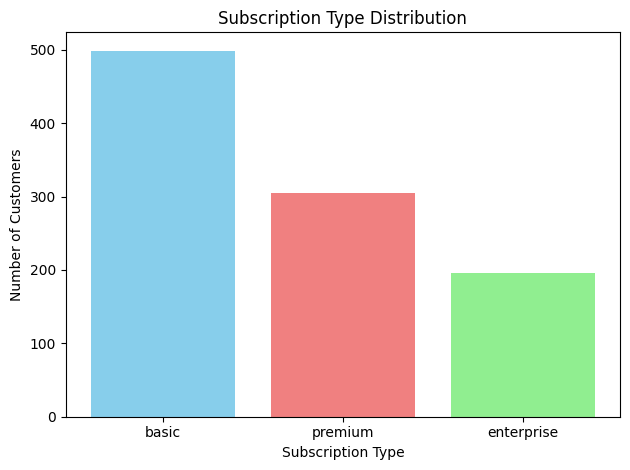

In [ ]:
# Plot 1: Subscription Type
plot_bar_chart(
    customers,
    'subscription_type',
    'Subscription Type Distribution',
    'Subscription Type',
    'Number of Customers',
    colors=['skyblue', 'lightcoral', 'lightgreen'],
)

Bar graph showing Customers by age group

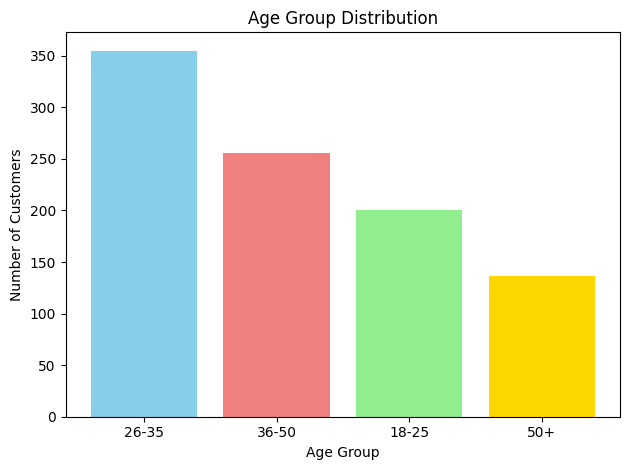

In [ ]:
# Plot 2: Age Group
plot_bar_chart(
    customers,
    'age_group',
    'Age Group Distribution',
    'Age Group',
    'Number of Customers',
    colors=['skyblue', 'lightcoral', 'lightgreen', 'gold'],
)

Bar graph showing customers by country

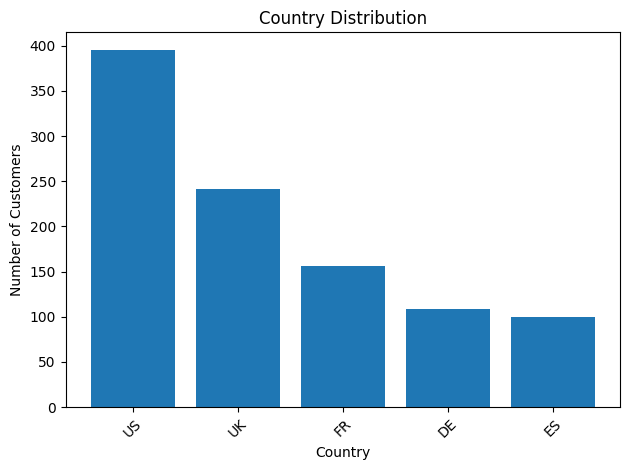

In [ ]:
# Plot 3: Country
plot_bar_chart(
    customers,
    'country',
    'Country Distribution',
    'Country',
    'Number of Customers',
    rotation=45,
)

### Customer Data Exploration Findings
Our customer base shows a clear disparity across subscription tiers, with the 'basic' tier dominating at 499 users, significantly outweighing the 'enterprise' tier, which serves only 196 customers. This trend is mirrored in age demographics, where the '26-35' age group is our largest segment (355 customers), while customers aged '50+' represent the smallest portion (136 customers). Geographically, the United States is our primary market, with 395 customers, compared to Spain, which has our smallest customer base at 100. These variations suggest a potential need to tailor our marketing and product strategies to better engage different customer segments.

## TRANSACTIONS

In [9]:
# load the dataset
transactions = pd.read_csv('transactions.csv')
transactions

,transaction_id,customer_id,date,product_id,quantity,unit_price,discount_applied
0,1,273,2023-11-17,34,4,229.71,0.0
1,2,6,2023-03-25,4,1,77.41,0.1
2,3,147,2023-11-22,61,8,392.95,0.0
3,4,184,2023-08-12,89,8,61.10,0.0
4,5,998,2023-05-09,70,2,487.84,0.0
...,...,...,...,...,...,...,...
50095,50096,829,2023-03-06,80,6,776.25,0.0
50096,50097,179,2023-03-28,4,1,752.68,0.1
50097,50098,306,2023-01-11,92,3,154.45,0.0
50098,50099,19,2023-04-24,39,1,347.01,0.0
